# Problema do Alinhamento de Sequencias de DNA
## Uma abordagem sobre o desempenho de diferentes algoritmos
### Aluno: Marcelo Cesário Miguel

#### imports

In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
def create_inputs(n_max,dimension,step):
    list_inputs = []
    for n in np.arange(4,n_max+1,step):
        if dimension == '2d':
            m = n
            seq=str(n)+' '+str(m)+" "+''.join(random.choices(['A','T','C','G','-'],k=n))+' '+\
            ''.join(random.choices(['A','T','C','G','-'],k=m))
            list_inputs.append(seq)
        else:
            for m in np.arange(4,n_max+1,step):
                # m = random.randint(n,n*5)
                # m = n # comentar caso tenha m diferente
                seq=str(n)+' '+str(m)+" "+''.join(random.choices(['A','T','C','G','-'],k=n))+' '+\
                ''.join(random.choices(['A','T','C','G','-'],k=m))
                list_inputs.append(seq)
    return list_inputs


def get_list_program(list_alg,list_inputs):
    list_execute=[]
    for i in list_alg:
        for input_ in list_inputs:
            n = input_.split()[0]
            m = input_.split()[1]
            start = time.perf_counter()
            proc = subprocess.run([i], input=input_, text=True, capture_output=True)
            end = time.perf_counter()
            algoritmo = list_alg[i]
            dic = {
                'Tempo':float(end-start),
                'Saida':int(proc.stdout.split()[-1]),
                'n': int(n),
                'm': int(m),
                'Algoritmo': algoritmo
            }
            list_execute.append(dic)
    return list_execute

## Parte 1 - Sequencial
#### PS: Parte 2 - Paralela se encontra no final do roteiro

## Análise com Smith Waterman e Random Local Search

- Smith Waterman
    - O Algoritmo de Smith-Waterman é um algoritmo de programação dinâmica que compara segmentos de todos os comprimentos possíveis e otimiza a medida de similaridade.
    
- Random Local Search
    - Busca local com métricas de aleatoriedade, no qual é criado uma subsequência sb de tamanho k para uma entrada e, feito isso, é feito várias subsequências sa da outra entrada com esse mesmo tamanho k, por fim é comparada cada uma das sa com a sb e retornado o par com maior similaridade.

In [51]:
list_alg = {'./main' : 'Smith Waterman','./random_local_search/main' : 'Random Local Search'}

In [52]:
list_inputs = create_inputs(2000,'2d',10)
list_execute = get_list_program(list_alg,list_inputs)

In [53]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [54]:
df

,Tempo,Saida,n,m,Algoritmo
0,0.008341,3,4,4,Smith Waterman
1,0.007763,6,14,14,Smith Waterman
2,0.008109,18,24,24,Smith Waterman
3,0.008527,16,34,34,Smith Waterman
4,0.008769,27,44,44,Smith Waterman
...,...,...,...,...,...
395,1.012811,9,1954,1954,Random Local Search
396,1.077691,-10,1964,1964,Random Local Search
397,1.063537,-7,1974,1974,Random Local Search
398,1.069931,12,1984,1984,Random Local Search


### Análise 2d

Análise bidimensional para entradas em que n e m tem o mesmo tamanho

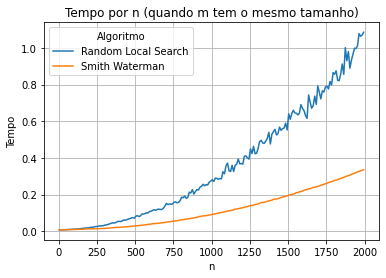

In [55]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot();
plt.title("Tempo por n (quando m tem o mesmo tamanho)");
plt.ylabel("Tempo");
plt.xlabel('n');
plt.grid();

Em uma primeira análise, percebe-se que a complexidade do Random Local Search está crescente. Isso ocorre pelo fato de que o K é aleatório, porém a repetição P é calculada a partir de todas as possibilidades de entradas com o mesmo tamanho K. Dessa forma, a complexidade acompanha o aumento de n e m.

Além disso, as curvas de tempo de cada um dos dois algoritmos podem estar com ruidos. Isso ocorre pelo fato de que o tempo está sendo calculado de uma maneira simples, apenas calculando a diferença de tempo antes e depois de rodar os algoritmos. Dessa forma, estão inclusos dentro desse cálculo outros processamentos do computador que influenciam no cálculo do tempo.

Dessa forma, caso rodado novamente as células acima que definem os valores do dataframe, o ruido dessa curva de tempo pode aumentar ou diminuir, mas a 'cara' da curva, que nesse caso seria exponencial para as duas continua a mesma

### Alterando o tempo do Random Local Search
Como o algoritmo de busca local do código Random Local Search é repetido 100 vezes para cada 'n', será dividido em 100 o tempo do Random Local Search para calcularmos apenas o tempo do algoritmo de busca local

In [56]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

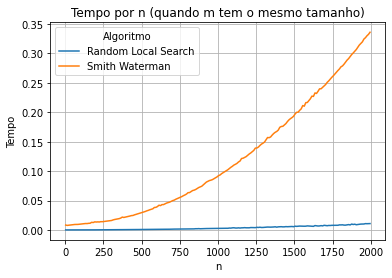

In [57]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n (quando m tem o mesmo tamanho)");
plt.ylabel("Tempo");
plt.grid();
plt.show();

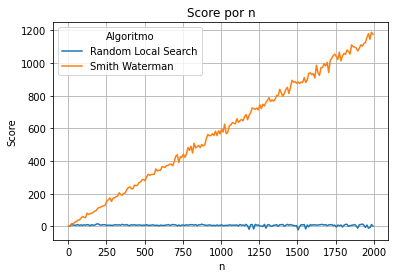

In [58]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");

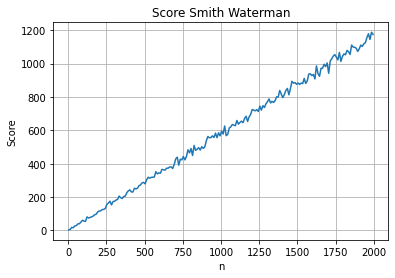

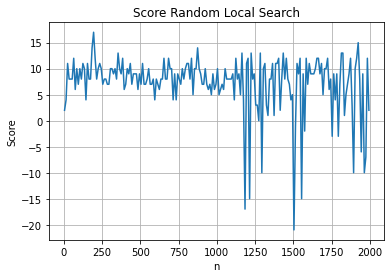

In [59]:
df.pivot(index='n',columns='Algoritmo',values='Saida')['Smith Waterman'].plot();
plt.title("Score Smith Waterman")
plt.grid()
plt.ylabel("Score");
plt.show()
df.pivot(index='n',columns='Algoritmo',values='Saida')['Random Local Search'].plot();
plt.title("Score Random Local Search")
plt.grid()
plt.ylabel("Score");
plt.show()

Análisando os Scores, mais especificamente do Random Local Search, percebe-se que seu Score não aumenta para sequências maiores, isso pode ser um indicativo de que repetir o código por uma constante (no caso 100 vezes) pode não ser o suficiente para garantir um bom desempenho do modelo. Dessa forma, essa constante pode ser baseada no tamanho da entrada de n ou m, por exemplo, para que a aleatoriedade acompanhe o tamanho de uma sequência.

Da mesma forma, pode não fazer sentido repetir o código 100 vezes para uma sequência muito pequena, pelo fato de que esse excesso de tentativas pode aproximar muito a busca local da busca exausta, uma vez que a busca local acabe testando todas as possibilidades possíveis por conta da entrada ser pequena em relação a entrada

### Análise em 3d

In [25]:
list_inputs = create_inputs(300,'3d',15)
list_execute = get_list_program(list_alg,list_inputs)

In [26]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [27]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

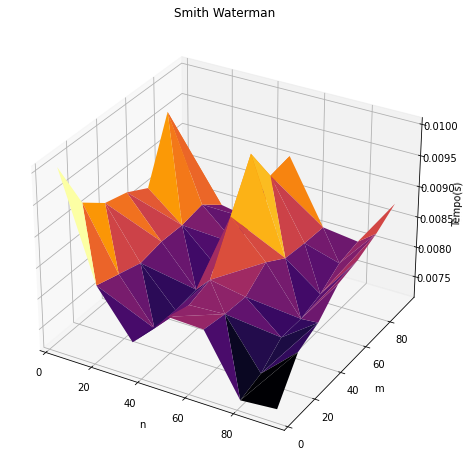

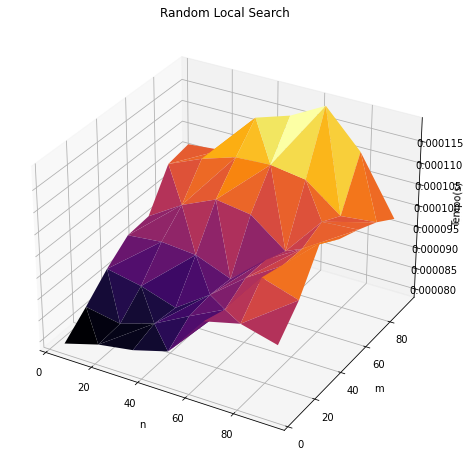

In [45]:
df_smith = df.loc[df['Algoritmo'] == 'Smith Waterman']
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot_trisurf(df_smith['n'], df_smith['m'], df_smith['Tempo'],cmap="inferno")
plt.title("Smith Waterman")
plt.xlabel('n')
plt.ylabel('m')
ax.set_zlabel('Tempo(s)')
plt.show()

df_random = df.loc[df['Algoritmo'] == 'Random Local Search']
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot_trisurf(df_random['n'], df_random['m'], df_random['Tempo'], cmap="inferno")
plt.title("Random Local Search")
plt.xlabel('n')
plt.ylabel('m')
ax.set_zlabel('Tempo(s)');

Como o calculo do tempo no python pode gerar alguns ruídos, análisar em 3d pode nem sempre ser a melhor opção para verificar a curva do tempo em função do aumento das entradas n e m

### Adicionando Exaustive Search
- Exaustive Search
    - Algoritmo que testa todas as substrings de uma entrada com todas as substrings da outra entrada, garantindo que sempre será retornado o melhor par de substrings possível

In [29]:
list_alg_exaust = {'./main' : 'Smith Waterman',
                   './random_local_search/main' : 'Random Local Search',
                   './exaustive_search/main':'Exaustive Search'}

In [31]:
print("Esse código pode demorar alguns minutos")
list_inputs = create_inputs(200,'2d',10)
list_execute = get_list_program(list_alg_exaust,list_inputs)

Esse código pode demorar alguns minutos


In [32]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [33]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

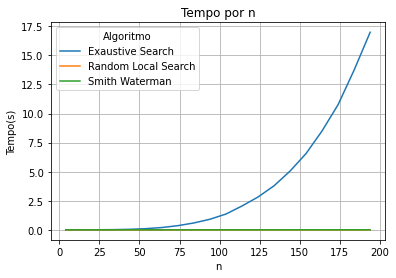

In [34]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo(s)");
plt.grid();

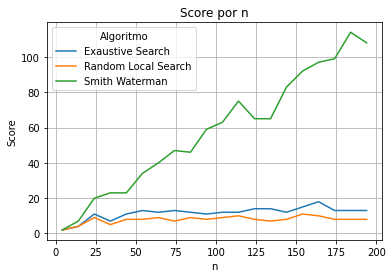

In [35]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");

Como o algoritmo Smith Waterman pode realizar manipulaçoes nas entradas, seu score não pode ser comparado com os demais. Dessa forma, analisando o Exaustive Search com o Random Local Search, percebe-se que o Exaustive Search sempre deve ter um Score maior ou igual ao Random Local Search, já que ambos não realizam manipulações nas sequências e o Exaustive Search testa todas as substrings possíveis das duas entradas.

In [47]:
print("Esse código pode demorar alguns minutos")
list_inputs = create_inputs(200,'3d',30)
list_execute = get_list_program(list_alg_exaust,list_inputs)

Esse código pode demorar alguns minutos


In [48]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [49]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

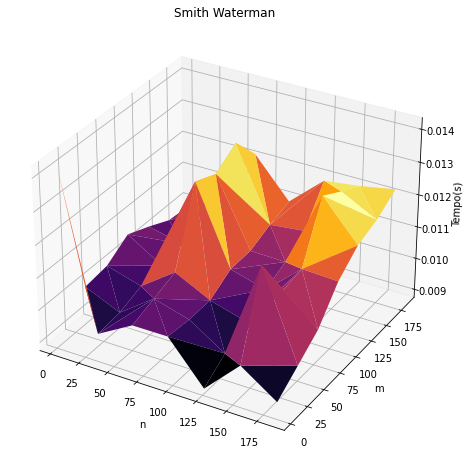

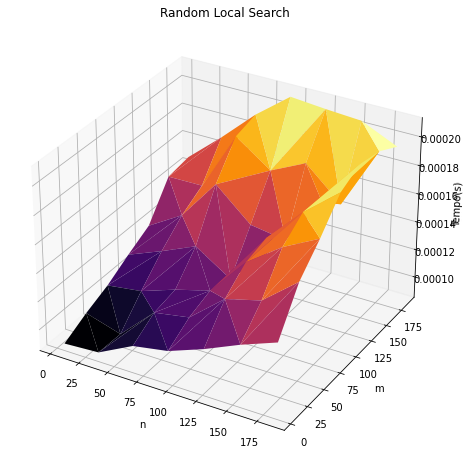

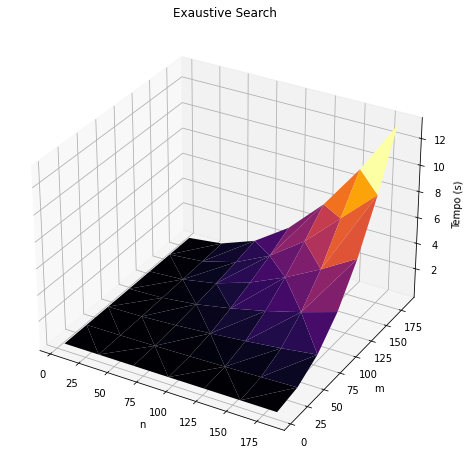

In [50]:
df_smith = df.loc[df['Algoritmo'] == 'Smith Waterman']
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot_trisurf(df_smith['n'], df_smith['m'], df_smith['Tempo'],cmap = "inferno")
plt.title("Smith Waterman")
plt.xlabel('n')
plt.ylabel('m')
ax.set_zlabel('Tempo(s)')
plt.show()

df_random = df.loc[df['Algoritmo'] == 'Random Local Search']
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot_trisurf(df_random['n'], df_random['m'], df_random['Tempo'],cmap = "inferno")
plt.title("Random Local Search")
plt.xlabel('n')
plt.ylabel('m')
ax.set_zlabel('Tempo(s)');

df_exaustive = df.loc[df['Algoritmo'] == 'Exaustive Search']
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot_trisurf(df_exaustive['n'], df_exaustive['m'], df_exaustive['Tempo'],cmap = "inferno")
plt.title("Exaustive Search")
plt.xlabel('n')
plt.ylabel('m')
ax.set_zlabel('Tempo (s)');

### Profiling

Utilizando a mesma entrada para os diferentes algoritmos

- Smith Waterman
!['Profiling Smith Waterman](profiling_smith2.png)

Pelo valgrind do Smith Waterman, a operação que demanda maior tempo é a de calcular o score dentro da matriz, que é calculado 10,609 vezes

- Random Local Search
!['Profiling Random Local Search](profiling_random2.png)

Pelo valgrind do Random Local Search, a operação que demanda maior tempo é a de calcular o score para todas as substrings aleatórias, sendo calculado 5,048 vezes (isso porque o código repete a operação de busca local 100 vezes)

- Exaustive Search
!['Profiling Exaustive Search](profiling_exaustive2.png)

Pelo valgrind do Exaustive Search, a operação que demanda maior tempo é a de calcular o match entre as duas entradas, sendo calculado 2,850,628 vezes.

### Conclusão
Apesar de cada algoritmo calcular valores diferentes de Score demorando tempos diferentes, não se pode afirmar qual algoritmo seria o melhor. Isso porque, para definir o melhor algoritmo nesse caso, é necessário definir uma métrica. Por exemplo, se a métrica for puramente tempo, o busca local é o recomendado, já se a métrica for score, o Smith Waterman é o melhor, assim como se o tempo não for um problema, o Exaustive Search pode ser o mais recomendado.

Dessa forma, a decisão de utilizar um algoritmo depende de quais métricas estão sendo levadas em consideração. Entretanto, a análise de mesmas entradas para diferentes algoritmos pode ser interessante tambem para ser avaliado se, para um tamanho de entrada X, qual o algoritmo faz mais sentido ser utilizado. Por exemplo, se a entrada for pequena, o tempo de um Exaustive Search pode ter uma diferença mínima quando comparado a outros algoritmos, porém, para entradas grandes, sua lentidão se destaca mais. Dessa forma, o tamanho das sequências tambem influenciam na decisão de um algoritmo 

## Parte 2 - Paralela

In [23]:
list_alg = {'./random_local_search/main' : 'Random Local Search',
            './random_parallel_search/main' : 'Random Parallel Local Search'}

In [24]:
list_inputs = create_inputs(2000,'2d',10)
list_execute = get_list_program(list_alg,list_inputs)

In [25]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [26]:
df

,Tempo,Saida,n,m,Algoritmo
0,0.006234,4,4,4,Random Local Search
1,0.006164,8,14,14,Random Local Search
2,0.006755,8,24,24,Random Local Search
3,0.006597,8,34,34,Random Local Search
4,0.008320,9,44,44,Random Local Search
...,...,...,...,...,...
395,0.334497,8,1954,1954,Random Parallel Local Search
396,0.389516,5,1964,1964,Random Parallel Local Search
397,0.379802,6,1974,1974,Random Parallel Local Search
398,0.428140,10,1984,1984,Random Parallel Local Search


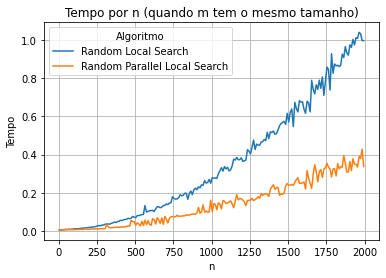

In [28]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot();
plt.title("Tempo por n (quando m tem o mesmo tamanho)");
plt.ylabel("Tempo");
plt.xlabel('n');
plt.grid();

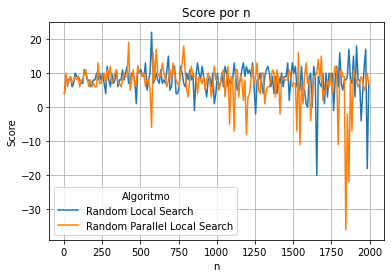

In [29]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");

In [16]:
list_alg = {'./random_local_search/main' : 'Random Local Search',
            './random_parallel_search/main' : 'Random Parallel Local Search'}

In [17]:
list_inputs = create_inputs(2000,'2d',10)
list_execute = get_list_program(list_alg,list_inputs)

In [18]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [19]:
df

,Tempo,Saida,n,m,Algoritmo
0,0.006382,2,4,4,Random Local Search
1,0.006405,6,14,14,Random Local Search
2,0.006057,5,24,24,Random Local Search
3,0.006384,7,34,34,Random Local Search
4,0.007550,7,44,44,Random Local Search
...,...,...,...,...,...
395,0.314717,12,1954,1954,Random Parallel Local Search
396,0.337534,12,1964,1964,Random Parallel Local Search
397,0.378749,1,1974,1974,Random Parallel Local Search
398,0.316603,11,1984,1984,Random Parallel Local Search


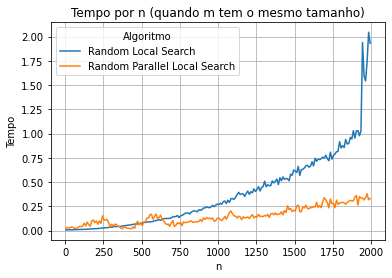

In [20]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot();
plt.title("Tempo por n (quando m tem o mesmo tamanho)");
plt.ylabel("Tempo");
plt.xlabel('n');
plt.grid();